# Novel Object Recognition Data Analysis

In this notebook, I will walk through my analysis pipeline for novel object recognition test based data.

In [1]:
import zebrafishanalysis as za

Here, I import the libraries I will be using to analyse. To describe their functions:

`zebrafishanalysis`: `za` is my package which provides useful tools for analysing idtrackerai data

In [2]:
same_obj_raw = za.load_gapless_trajectories(wo_gaps="nor_data/m_1_f_1/same_obj.npy")
diff_obj_raw = za.load_gapless_trajectories(wo_gaps="nor_data/m_1_f_1/diff_obj.npy")

same_obj_locations = za.select_pos_from_video("nor_data/m_1_f_1/same_obj.mp4")
diff_obj_locations = za.select_pos_from_video("nor_data/m_1_f_1/diff_obj.mp4")

same_obj = za.NovelObjectRecognitionTest(same_obj_raw, same_obj_locations)
diff_obj = za.NovelObjectRecognitionTest(diff_obj_raw, diff_obj_locations)

`za.load_gapless_trajectories(wo_gaps)`: This function reads in an idtrackerai produced wo_gaps file

`za.select_pos_from_video(path)` : This function brings up a GUI that allows the researcher to select the locations of objects in the video

`za.NovelObjectRecognitionTest(trajectories, object_locations)` : Creates an object to hold the trajectories in a nicer format, and provides multiple tools for analysis of the trajectories

In [3]:
same_prefs = same_obj.determine_object_preference_by_frame(100)
diff_prefs = diff_obj.determine_object_preference_by_frame(100)

`determine_object_preference_by_frame(explore_area_radius)` : Returns a tuple that contains preference for objects (a, b, no preference) by frame

In [4]:
za.get_measures(same_prefs, diff_prefs)

{'e1': 3216,
 'e2': 7378,
 'd1': 6854,
 'd2': 0.9289780428300353,
 'd3': 0.9644890214150176}

`get_mesaures` provides an implementation of the method described in the [Akkerman et al](https://doi.org/10.1016/j.bbr.2012.03.024) paper to analyse NORT data. Briefly:
- e1: Total exploration time in the familiarisation trial
- e2: Total exploration time in the testing trial
- d1: Prefrence for novel object over familiar in testing trial
- d2: d1/e1
- d3: Preference for novel object out of all preference in testing trial

Interestingly, the Akkerman paper suggests that d2 and d3 render the same statistical outcome, whereas d1 will not, as it is not correcting for differences in exploration. As d2 and d3 can be used interchangably, I provide both in the output.

Side note: `get_measures` assumes that, for the different object test, that the blue, object_b marker, is placed on the novel object.

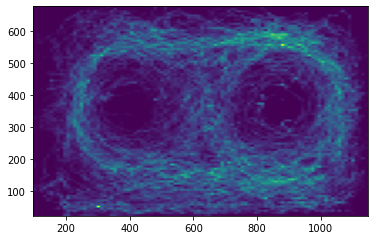

In [5]:
za.create_heatmap(same_obj, 100)

The `create_heatmap(object, bins)` function can be used to plot a heatmap of a fish from a fish object.

In [6]:
fish_one_full = za.crush_multiple_objects([same_obj, diff_obj])
za.create_heatmap(fish_one_full, 100)

AttributeError: 'numpy.ndarray' object has no attribute 'flatten_fish_positions'

<Figure size 432x288 with 0 Axes>